# Week 7 - Milestone One week

# 1. Lesson: no lesson this week.  Milestone One is due!

# 2. Weekly graph question

Below are the graphs from last week's weekly graph question.  Suppose you wanted to cause the viewer to examine the last three months of data first.  How could you use preattentive attributes to do that?  Suggest several possibilities.

In [7]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_5275/2149468501.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Nitrate level (% of eutrophic value)')

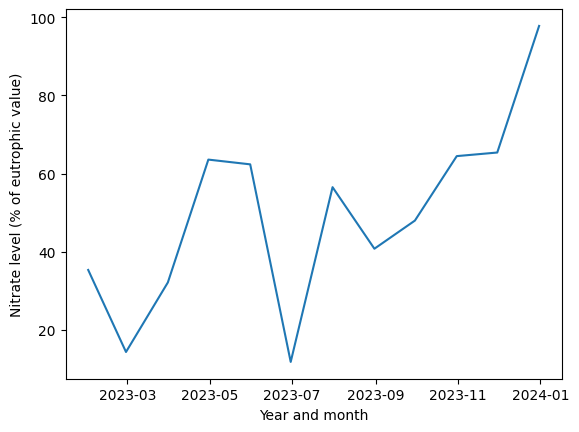

In [2]:
numdates = 12
np.random.seed(0)
time_series = 100 * (np.random.normal(size = numdates) / 5 + np.arange(numdates) / 16)
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Nitrate level (% of eutrophic value)")

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_5275/1012779568.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')


Text(0, 0.5, 'Phosphate level (% of eutrophic value)')

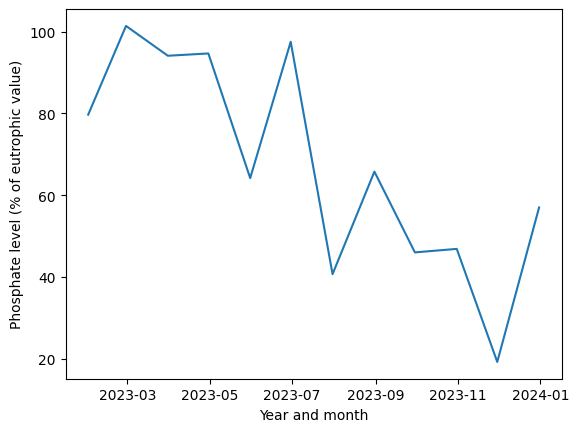

In [3]:
np.random.seed(1)
time_series = 100 * (1 - (np.random.normal(size = numdates) / 8 + np.arange(numdates) / 16))
datearray = pd.date_range(start='2023/01/01', end='2024/01/01', freq='M')
ax = sns.lineplot(x = datearray, y = time_series)
ax.set_xlabel("Year and month")
ax.set_ylabel("Phosphate level (% of eutrophic value)")

# 3. Working on your datasets

This week, you can work on Milestone One rather than having a particular exercise about working on your datasets

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 99-119 of the Storytelling With Data book as best you can. (The first half of chapter four). You do not have to get the exact data values right, just the overall look and feel.

For this one, I'll attempt to reproduce Figure 4.9 from page 111.


First, the data: 

In [4]:
d = { 'Top 10 design concerns': ['Engine power is less than expected', 'Tires make excessive noise while driving', 'Engine makes abnormal/excessive noise', 'Seat material concerns', 'Excessive wind noise', 'Hesitation or delay when shifting', 'Bluetooth system has poor soud quality', 'Steering system/wheel has too much play', 'Bluetooth system is difficult to use', 'Front seat audio/entertainment/navigation controls'], 'concerns per 1,000': [12.9, 12.3, 11.6, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.2] }
df = pd.DataFrame(data=d)
df

,Top 10 design concerns,"concerns per 1,000"
0,Engine power is less than expected,12.9
1,Tires make excessive noise while driving,12.3
2,Engine makes abnormal/excessive noise,11.6
3,Seat material concerns,11.6
4,Excessive wind noise,11.0
5,Hesitation or delay when shifting,10.3
6,Bluetooth system has poor soud quality,10.0
7,Steering system/wheel has too much play,8.8
8,Bluetooth system is difficult to use,8.6
9,Front seat audio/entertainment/navigation cont...,8.2


___

## **Answer**

This is the original one I made without any formatting 

<Axes: xlabel='concerns per 1,000', ylabel='Top 10 design concerns'>

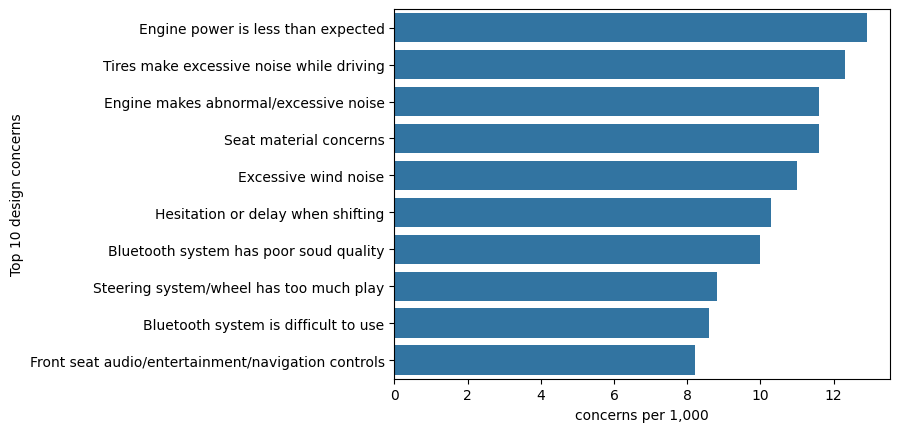

In [5]:
sns.barplot(
    x=df['concerns per 1,000'], 
    y=df['Top 10 design concerns'], 
    orient='h'
)

This is as close as I could get with ChatGPT: 
- Wouldn't let me share the link so the full conversation is below.

/var/folders/wg/hrk6rd4s2mv7ztvpxryxn48c0000gn/T/ipykernel_5275/3835202099.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


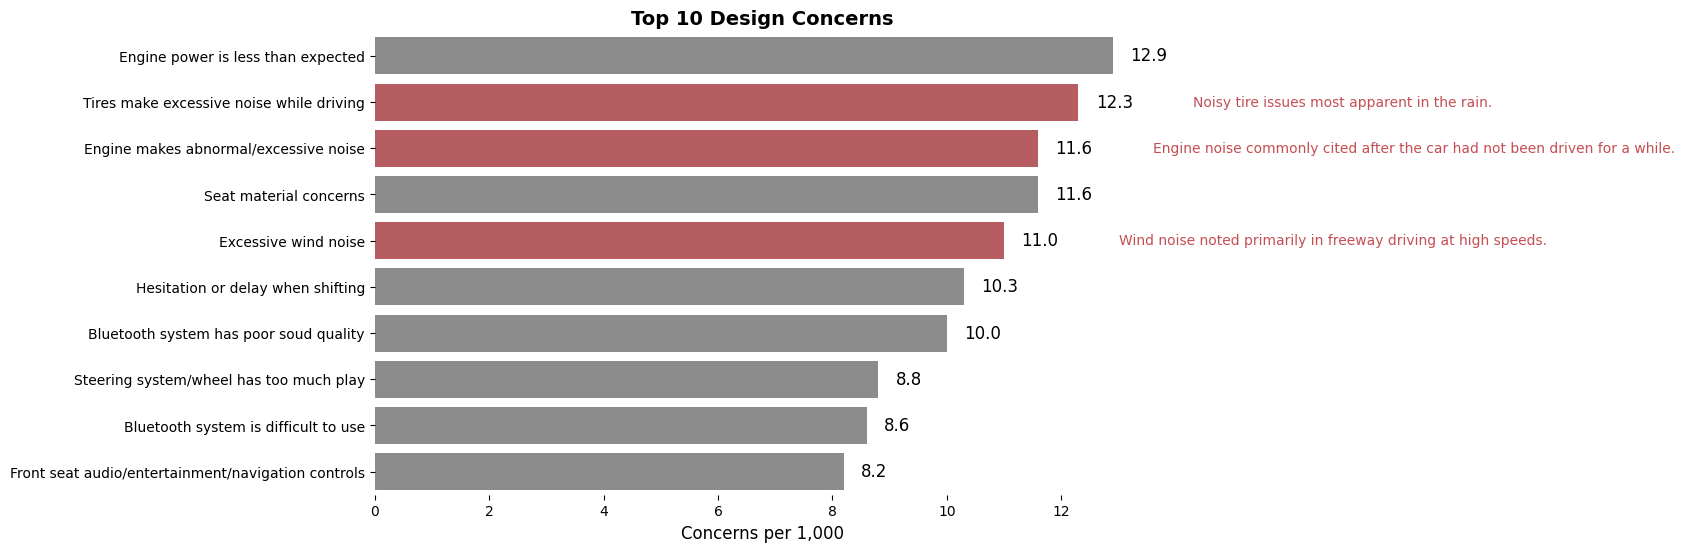

In [8]:
# Define custom colors (highlighting noise-related concerns in red shades)
colors = ['#c44e52' if 'noise' in concern.lower() else '#8c8c8c' for concern in df['Top 10 design concerns']]

# Set figure size
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    x=df['concerns per 1,000'], 
    y=df['Top 10 design concerns'], 
    orient='h', 
    palette=colors
)

# Add title and labels
plt.title('Top 10 Design Concerns', fontsize=14, fontweight='bold')
plt.xlabel('Concerns per 1,000', fontsize=12)
plt.ylabel('')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Annotate key numbers to the right of each bar
for index, row in df.iterrows():
    ax.text(row['concerns per 1,000'] + 0.3, index, f"{row['concerns per 1,000']:.1f}", 
            color='black', ha='left', va='center', fontsize=12)

# Annotate key insights
annotations = {
    "Tires make excessive noise while driving": "Noisy tire issues most apparent in the rain.",
    "Engine makes abnormal/excessive noise": "Engine noise commonly cited after the car had not been driven for a while.",
    "Excessive wind noise": "Wind noise noted primarily in freeway driving at high speeds."
}

for index, row in df.iterrows():
    if row['Top 10 design concerns'] in annotations:
        ax.text(row['concerns per 1,000'] + 2.0, index, annotations[row['Top 10 design concerns']], 
                 fontsize=10, color='#c44e52', ha='left', va='center')

# Show the plot
plt.show()


___

And this is a happy middle ground :)

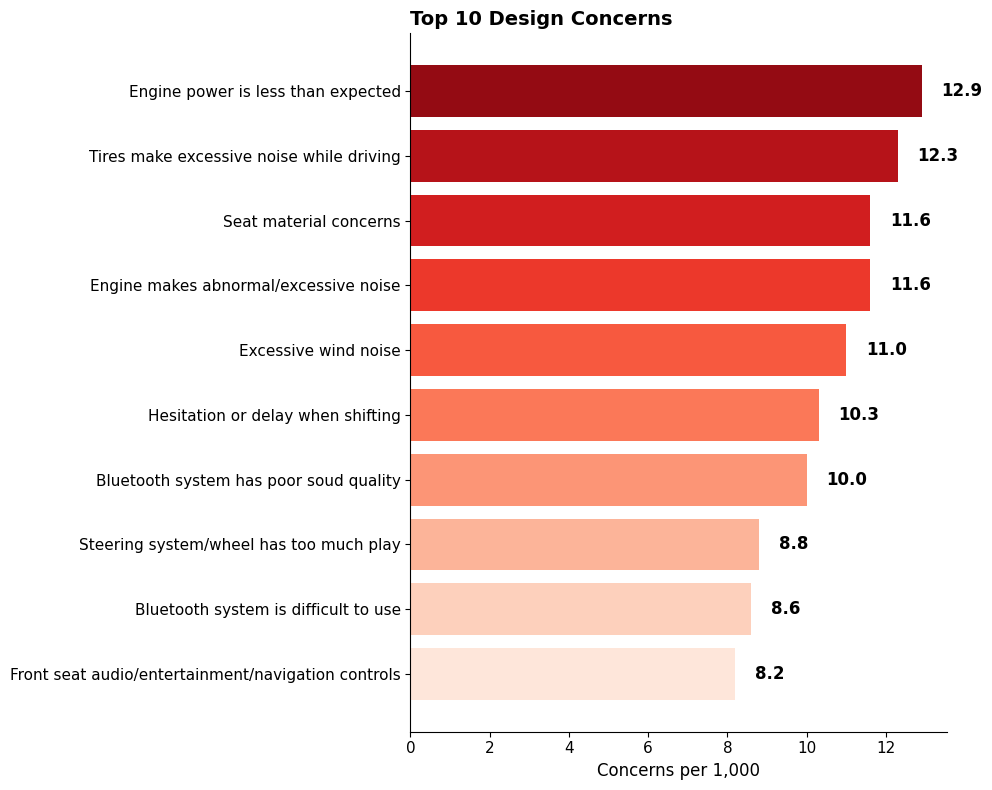

In [ ]:
df = df.sort_values(by='concerns per 1,000', ascending=True)


colors = sns.color_palette("Reds", len(df))  

plt.figure(figsize=(10, 8))


bars = plt.barh(df['Top 10 design concerns'], df['concerns per 1,000'], color=colors)
for bar, value in zip(bars, df['concerns per 1,000']):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2, 
             f"{value:.1f}", ha="left", va="center", fontsize=12, fontweight="bold", color="black")


plt.title("Top 10 Design Concerns", fontsize=14, fontweight="bold", loc="left")
plt.xlabel("Concerns per 1,000", fontsize=12)
plt.ylabel("")
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)

plt.tight_layout()
plt.show()

___

___

Conversation with ChatGPT: 
This is as close as I could get with ChatGPT: 
- 
So I am trying to replicate this graph -- this is the code I have so far: 

sns.barplot(
    x=df['concerns per 1,000'], 
    y=df['Top 10 design concerns'], 
    orient='h'
)

And I am working with this data: 

d = { 'Top 10 design concerns': ['Engine power is less than expected', 'Tires make excessive noise while driving', 'Engine makes abnormal/excessive noise', 'Seat material concerns', 'Excessive wind noise', 'Hesitation or delay when shifting', 'Bluetooth system has poor soud quality', 'Steering system/wheel has too much play', 'Bluetooth system is difficult to use', 'Front seat audio/entertainment/navigation controls'], 'concerns per 1,000': [12.9, 12.3, 11.6, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.2] }
df = pd.DataFrame(data=d)


-- Can you help me replicate the following? I am not sure on the seaborn syntax needed

df
ChatGPT said:
Yes! To replicate the visual hierarchy of the given graph using Seaborn, you’ll need to:

Use sns.barplot() to create a horizontal bar chart.
Adjust colors to highlight key categories (e.g., noise-related concerns in red shades).
Format the text properly (bold title, aligned labels, readable font).
Add annotations for key insights.
Here’s the full Seaborn + Matplotlib code to achieve this:

python
Copy
Edit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame
d = { 
    'Top 10 design concerns': [
        'Engine power is less than expected', 
        'Tires make excessive noise while driving', 
        'Engine makes abnormal/excessive noise', 
        'Seat material concerns', 
        'Excessive wind noise', 
        'Hesitation or delay when shifting', 
        'Bluetooth system has poor sound quality', 
        'Steering system/wheel has too much play', 
        'Bluetooth system is difficult to use', 
        'Front seat audio/entertainment/navigation controls'
    ], 
    'concerns per 1,000': [12.9, 12.3, 11.6, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.2]
}
df = pd.DataFrame(data=d)

# Define custom colors (highlighting noise-related concerns in red shades)
colors = ['#c44e52' if 'noise' in concern.lower() else '#8c8c8c' for concern in df['Top 10 design concerns']]

# Set figure size
plt.figure(figsize=(10, 6))

# Create barplot
sns.barplot(
    x=df['concerns per 1,000'], 
    y=df['Top 10 design concerns'], 
    orient='h', 
    palette=colors
)

# Add title and labels
plt.title('Top 10 Design Concerns', fontsize=14, fontweight='bold')
plt.xlabel('Concerns per 1,000', fontsize=12)
plt.ylabel('')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Annotate key points
annotations = {
    "Tires make excessive noise while driving": "Noisy tire issues most apparent in the rain.",
    "Engine makes abnormal/excessive noise": "Engine noise commonly cited after the car had not been driven for a while.",
    "Excessive wind noise": "Wind noise noted primarily in freeway driving at high speeds."
}

for index, row in df.iterrows():
    if row['Top 10 design concerns'] in annotations:
        plt.text(row['concerns per 1,000'] + 0.5, index, annotations[row['Top 10 design concerns']], 
                 fontsize=10, color='#c44e52')

# Show the plot
plt.show()
Breakdown of Improvements:
Color Coding: Highlights noise-related concerns with red shades for easy identification.
Annotations: Adds relevant insights to match the original infographic.
Formatting: Improves readability with a bold title, removed spines, and properly aligned text.
This should get you very close to the original design! 🚀 Let me know if you need tweaks.

You said:
Hmm can you help me with the labels to the right? like the numbers for each bar?
ChatGPT said:
Yes! You can add the concern numbers (concerns per 1,000) as labels on the right side of each bar using plt.text(). Here's the updated code that places these values at the end of each bar, aligning them properly:

Updated Code:
python
Copy
Edit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create the DataFrame
d = { 
    'Top 10 design concerns': [
        'Engine power is less than expected', 
        'Tires make excessive noise while driving', 
        'Engine makes abnormal/excessive noise', 
        'Seat material concerns', 
        'Excessive wind noise', 
        'Hesitation or delay when shifting', 
        'Bluetooth system has poor sound quality', 
        'Steering system/wheel has too much play', 
        'Bluetooth system is difficult to use', 
        'Front seat audio/entertainment/navigation controls'
    ], 
    'concerns per 1,000': [12.9, 12.3, 11.6, 11.6, 11.0, 10.3, 10.0, 8.8, 8.6, 8.2]
}
df = pd.DataFrame(data=d)

# Define custom colors (highlighting noise-related concerns in red shades)
colors = ['#c44e52' if 'noise' in concern.lower() else '#8c8c8c' for concern in df['Top 10 design concerns']]

# Set figure size
plt.figure(figsize=(10, 6))

# Create barplot
ax = sns.barplot(
    x=df['concerns per 1,000'], 
    y=df['Top 10 design concerns'], 
    orient='h', 
    palette=colors
)

# Add title and labels
plt.title('Top 10 Design Concerns', fontsize=14, fontweight='bold')
plt.xlabel('Concerns per 1,000', fontsize=12)
plt.ylabel('')

# Remove spines for a cleaner look
sns.despine(left=True, bottom=True)

# Annotate key numbers to the right of each bar
for index, row in df.iterrows():
    ax.text(row['concerns per 1,000'] + 0.3, index, f"{row['concerns per 1,000']:.1f}", 
            color='black', ha='left', va='center', fontsize=12)

# Annotate key insights
annotations = {
    "Tires make excessive noise while driving": "Noisy tire issues most apparent in the rain.",
    "Engine makes abnormal/excessive noise": "Engine noise commonly cited after the car had not been driven for a while.",
    "Excessive wind noise": "Wind noise noted primarily in freeway driving at high speeds."
}

for index, row in df.iterrows():
    if row['Top 10 design concerns'] in annotations:
        ax.text(row['concerns per 1,000'] + 2.0, index, annotations[row['Top 10 design concerns']], 
                 fontsize=10, color='#c44e52', ha='left', va='center')

# Show the plot
plt.show()
What's New:
✅ Numbers on the Right: Each bar now has its corresponding concerns per 1,000 value neatly aligned at the right end.
✅ Proper Spacing: Uses ha='left' and a slight offset (+0.3) to avoid overlap.
✅ Annotations Remain: Key insights are still highlighted, making the graph more informative.

This should closely match the layout you're aiming for! Let me know if you need fine-tuning. 🚀